<h1>Screen time and mental health</h1>

<h3>(Struktur rekken)Data Description,Visualisation, Analysis, Results, Conclusion</h3>

##Intorduction

##Data collection and description

##Load necessary libraries

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [58]:
# Load the dataset
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')
df.head()  # Display the first few rows of the dataset

Happiness  Fear of Missing Out  Nevrotik  Conscientiousnes  Openness  \
0       2.48                 3.05       4.4               1.2       4.0   
1       3.86                 2.82       3.4               5.0       5.0   
2       3.29                 1.50       3.4               3.6       3.2   
3       3.82                 3.23       1.6               5.0       4.6   
4       3.77                 2.86       2.0               4.0       5.0   

   Agreeableness  Honesty  Smartphone Addiction  Gaming Addiction  \
0            3.2      2.2                  3.03              4.67   
1            3.8      4.2                  2.58              1.22   
2            4.0      3.8                  1.21              0.00   
3            4.6      4.6                  4.30              0.00   
4            3.0      3.8                  2.00              1.78   

   Social Media Tolerance  Social Media Compulsion  \
0                     3.0                     3.00   
1                     3.2                     2.78   
2                     1.8                     1.33   
3                     5.0                     4.67   
4                     2.2                     2.44   

   Social Media Procrastination  Social Media Information Seeking  Target  
0                          3.22                              3.50       0  
1                          1.89                              3.50       1  
2                          1.00                              1.83       1  
3                          4.00                              3.67       1  
4                          2.56                              2.33       1

#Checking missing values

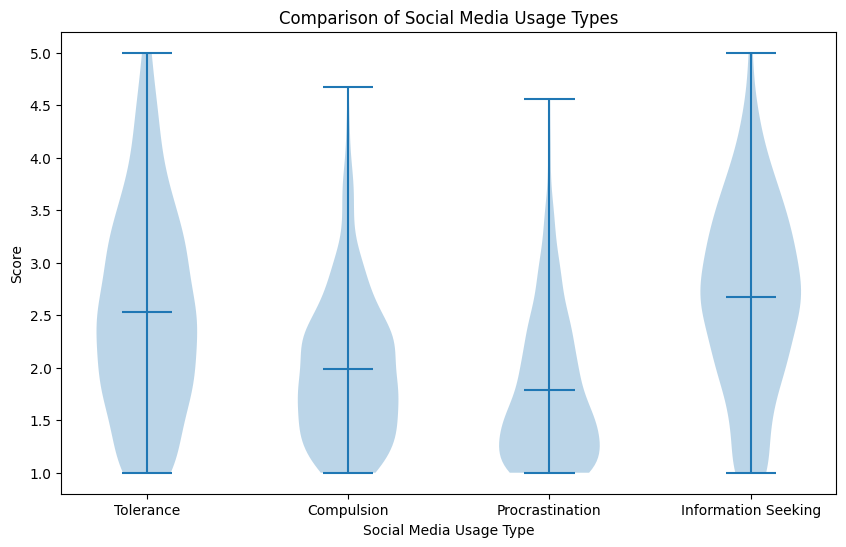

In [59]:
# @title Comparison of Social Media Usage Types

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
plt.figure(figsize=(10, 6))
plt.violinplot([df['Social Media Tolerance'], df['Social Media Compulsion'], df['Social Media Procrastination'], df['Social Media Information Seeking']], showmeans=True)
plt.xticks([1, 2, 3, 4], ['Tolerance', 'Compulsion', 'Procrastination', 'Information Seeking'])
plt.xlabel('Social Media Usage Type')
plt.ylabel('Score')
_ = plt.title('Comparison of Social Media Usage Types')

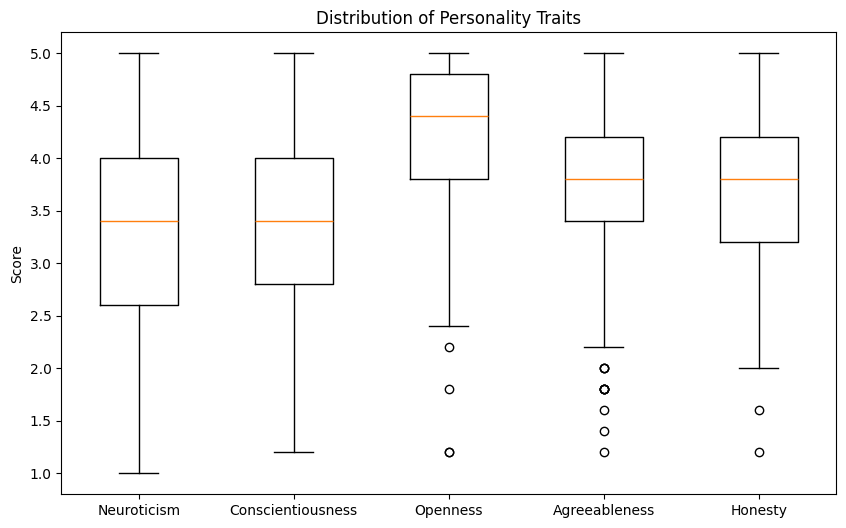

In [60]:
# @title Distribution of Personality Traits

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
plt.figure(figsize=(10, 6))
plt.boxplot([df['Nevrotik'], df['Conscientiousnes'], df['Openness'], df['Agreeableness'], df['Honesty']], labels=['Neuroticism', 'Conscientiousness', 'Openness', 'Agreeableness', 'Honesty'])
plt.ylabel('Score')
_ = plt.title('Distribution of Personality Traits')

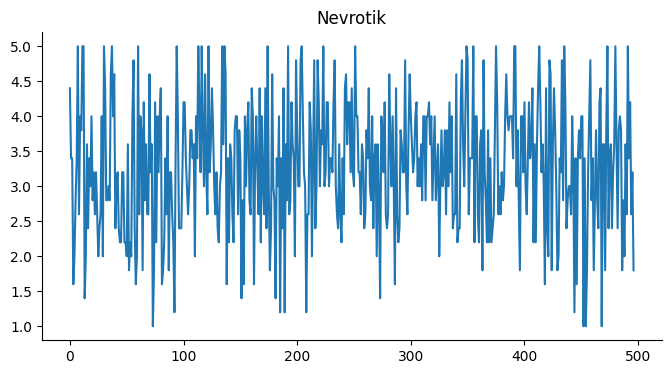

In [61]:
# @title Nevrotik

from matplotlib import pyplot as plt
df['Nevrotik'].plot(kind='line', figsize=(8, 4), title='Nevrotik')
plt.gca().spines[['top', 'right']].set_visible(False)

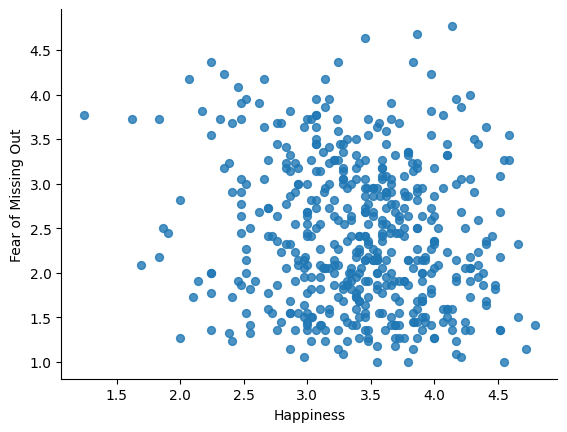

In [62]:
# @title Happiness vs Fear of Missing Out

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Happiness', y='Fear of Missing Out', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

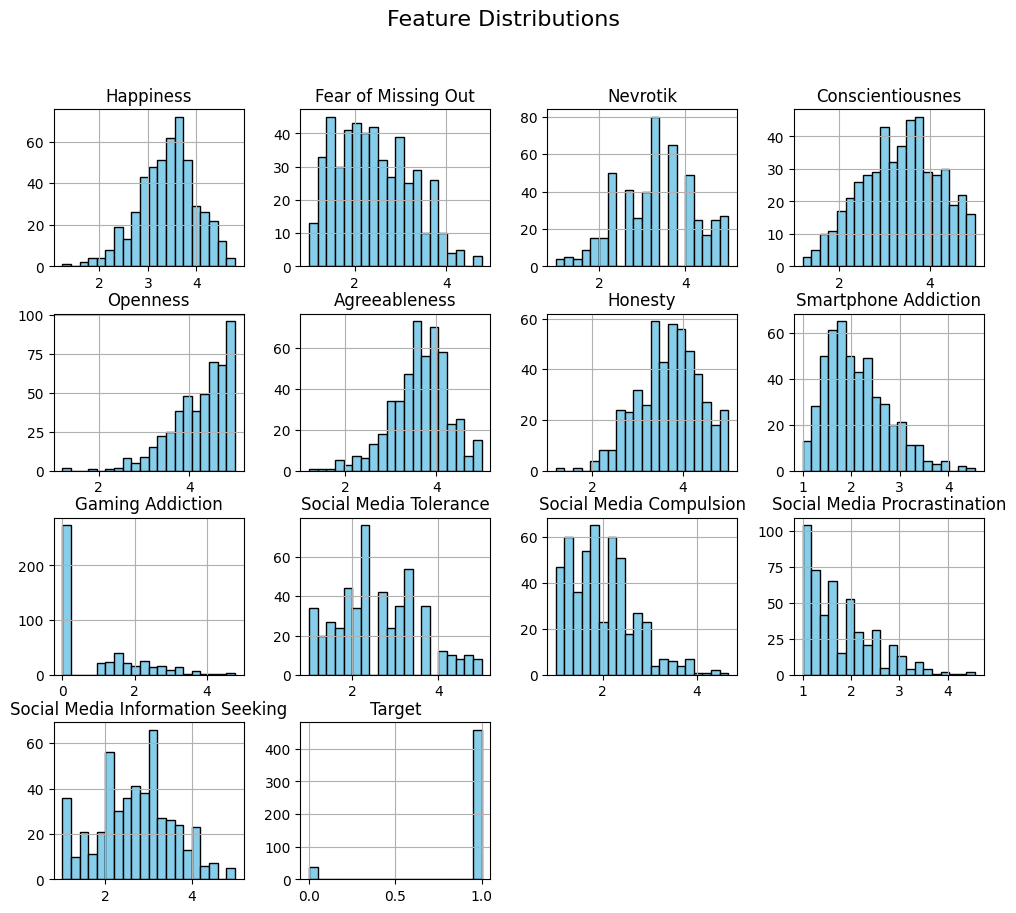

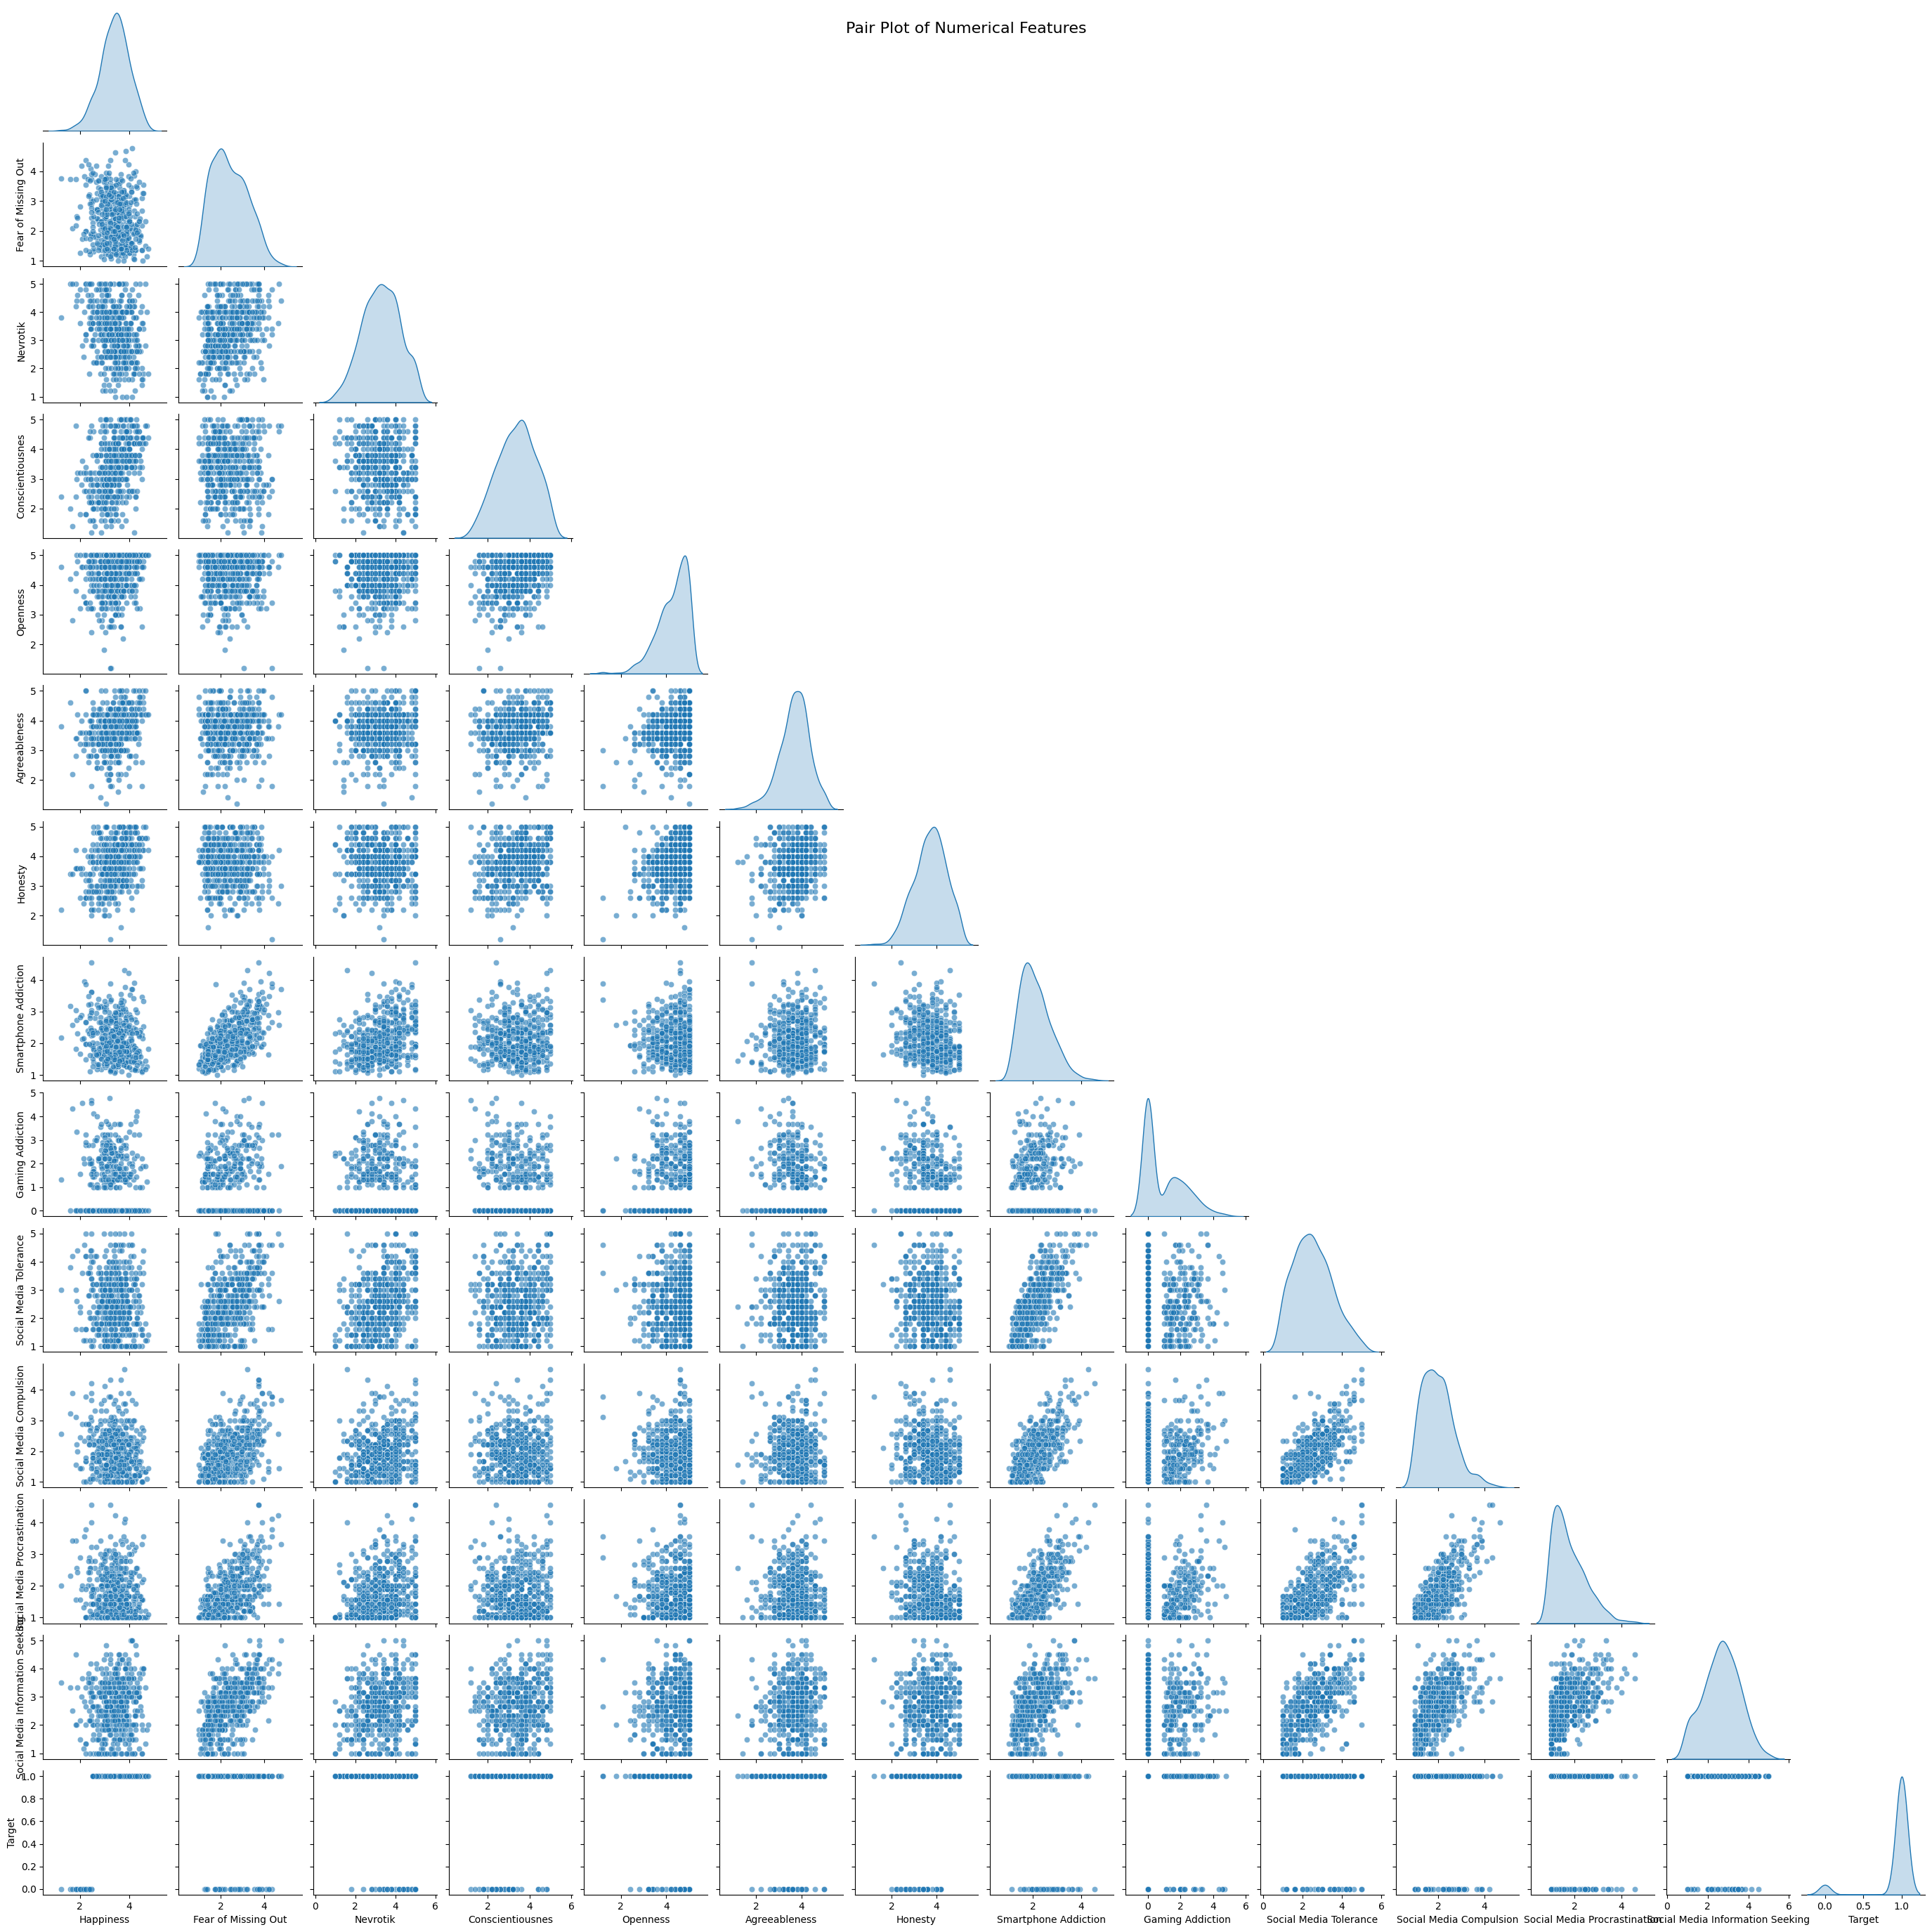

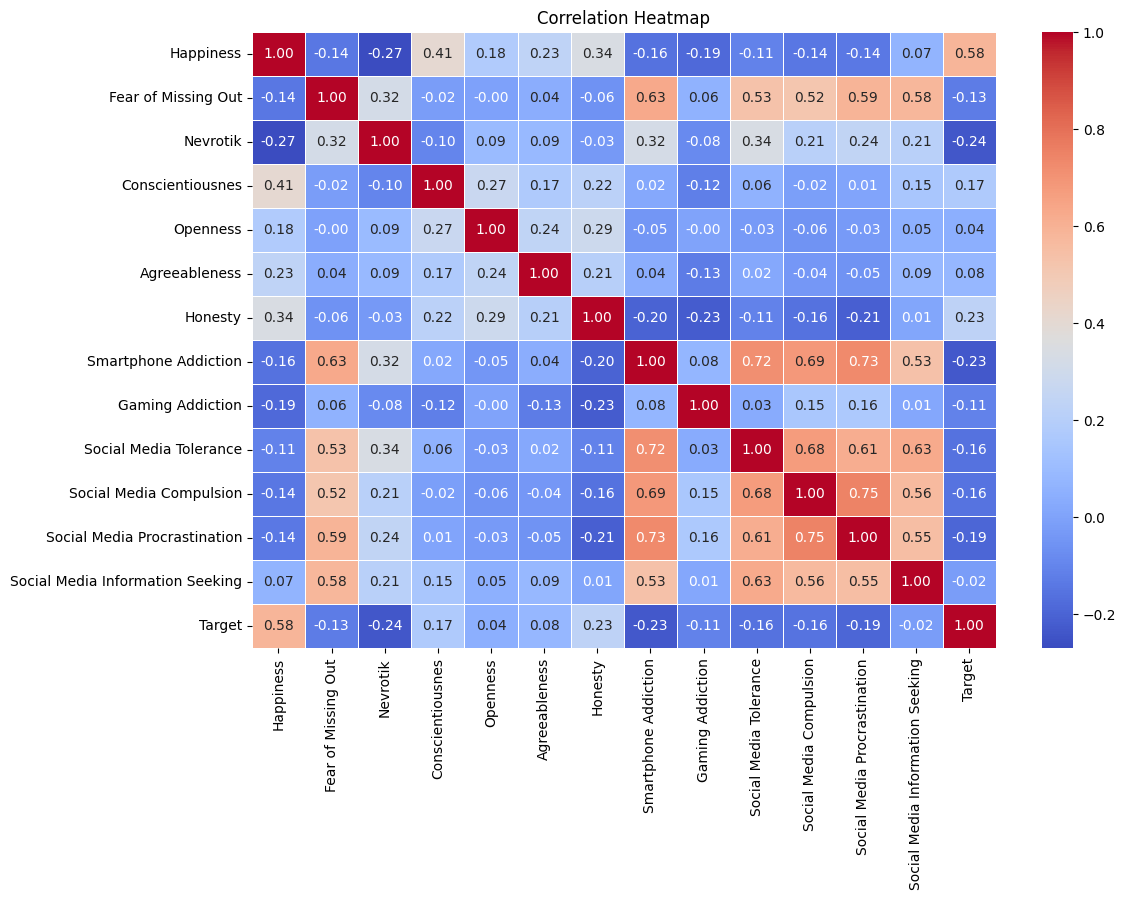

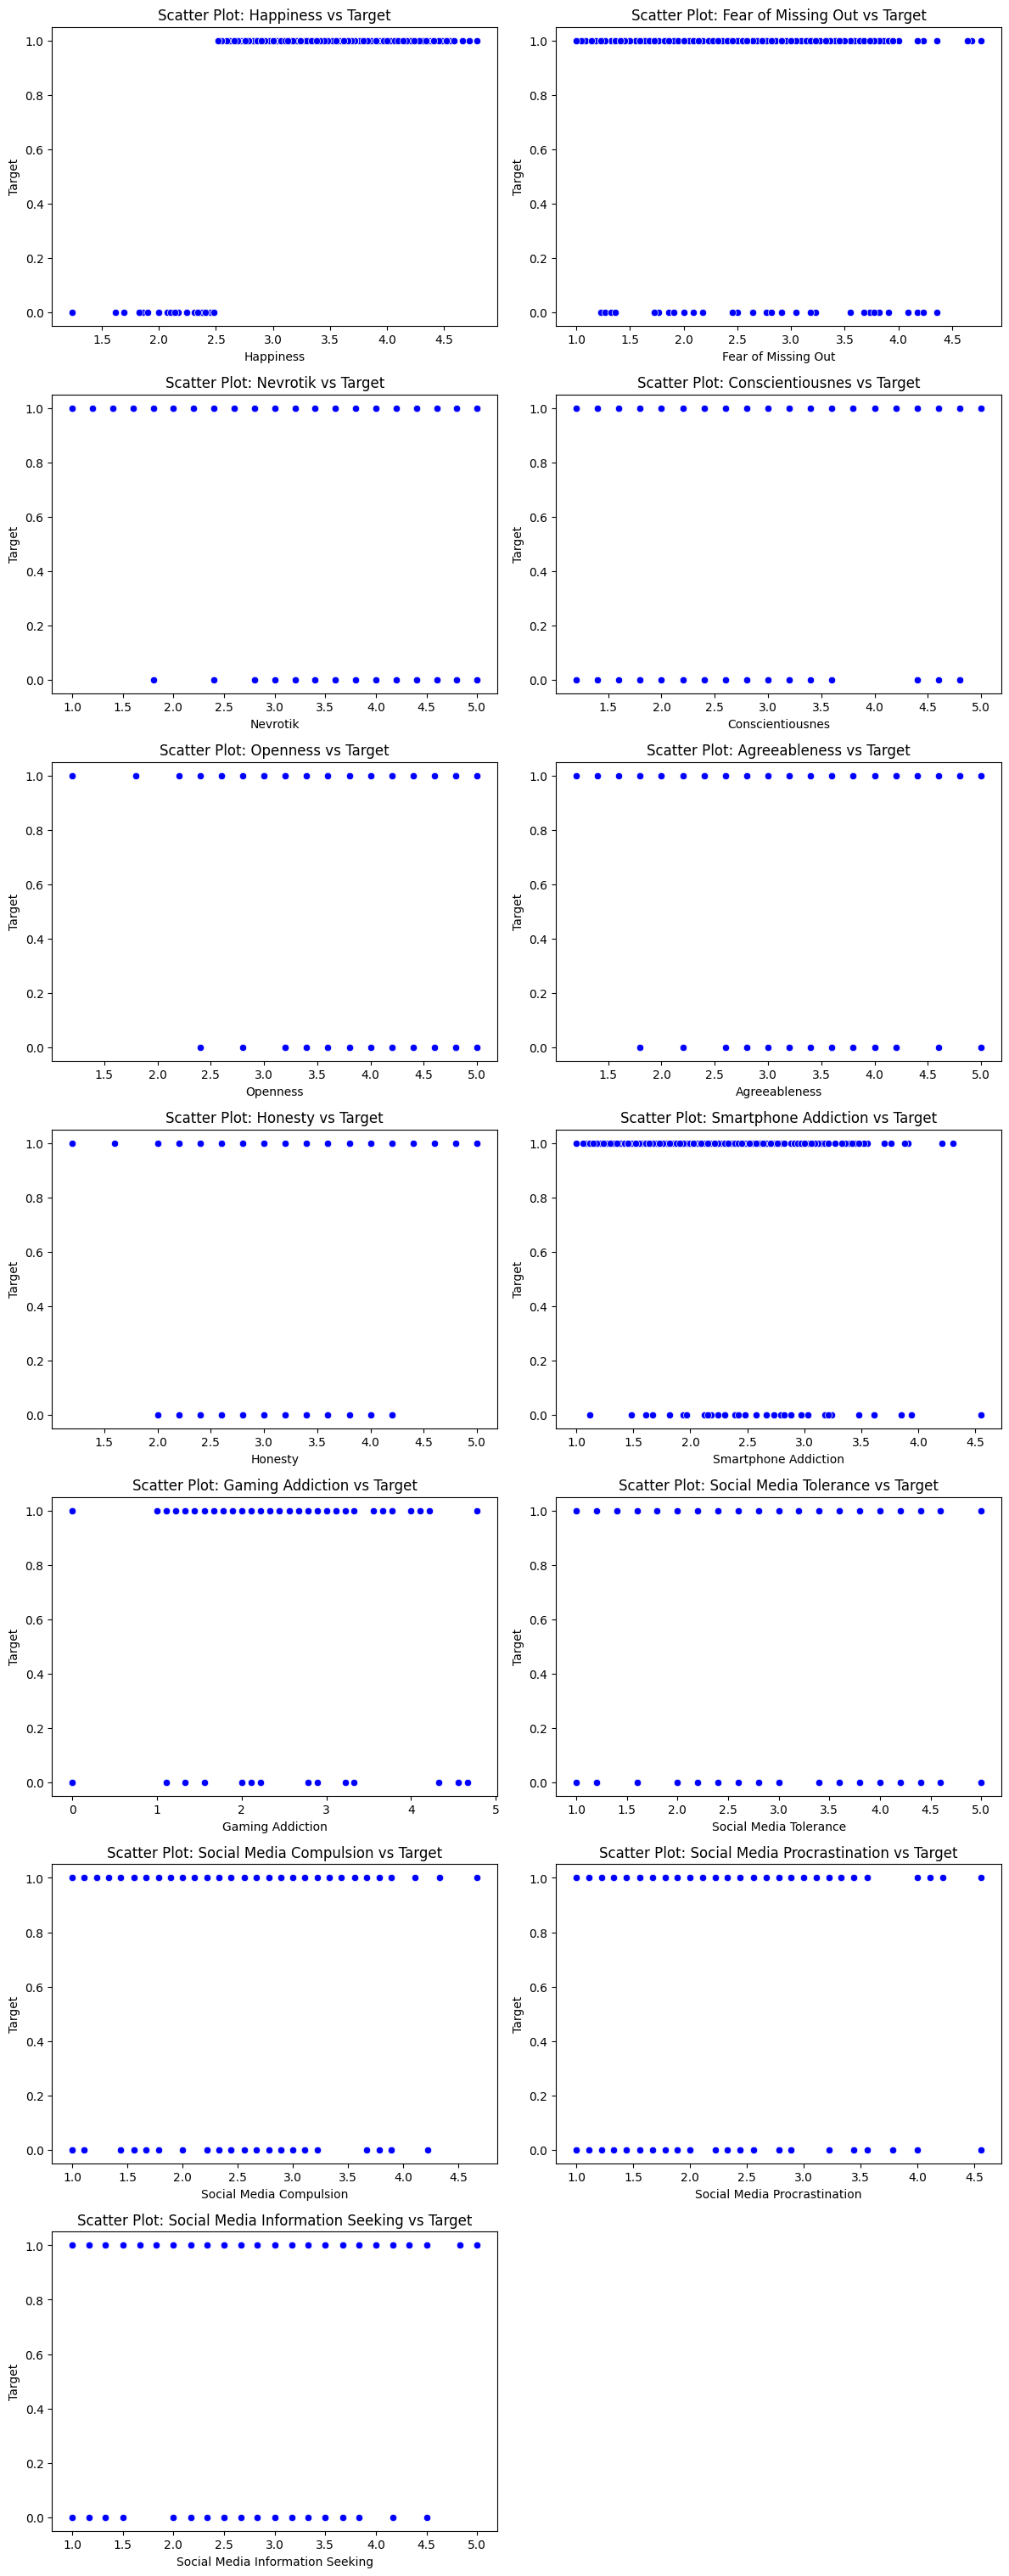

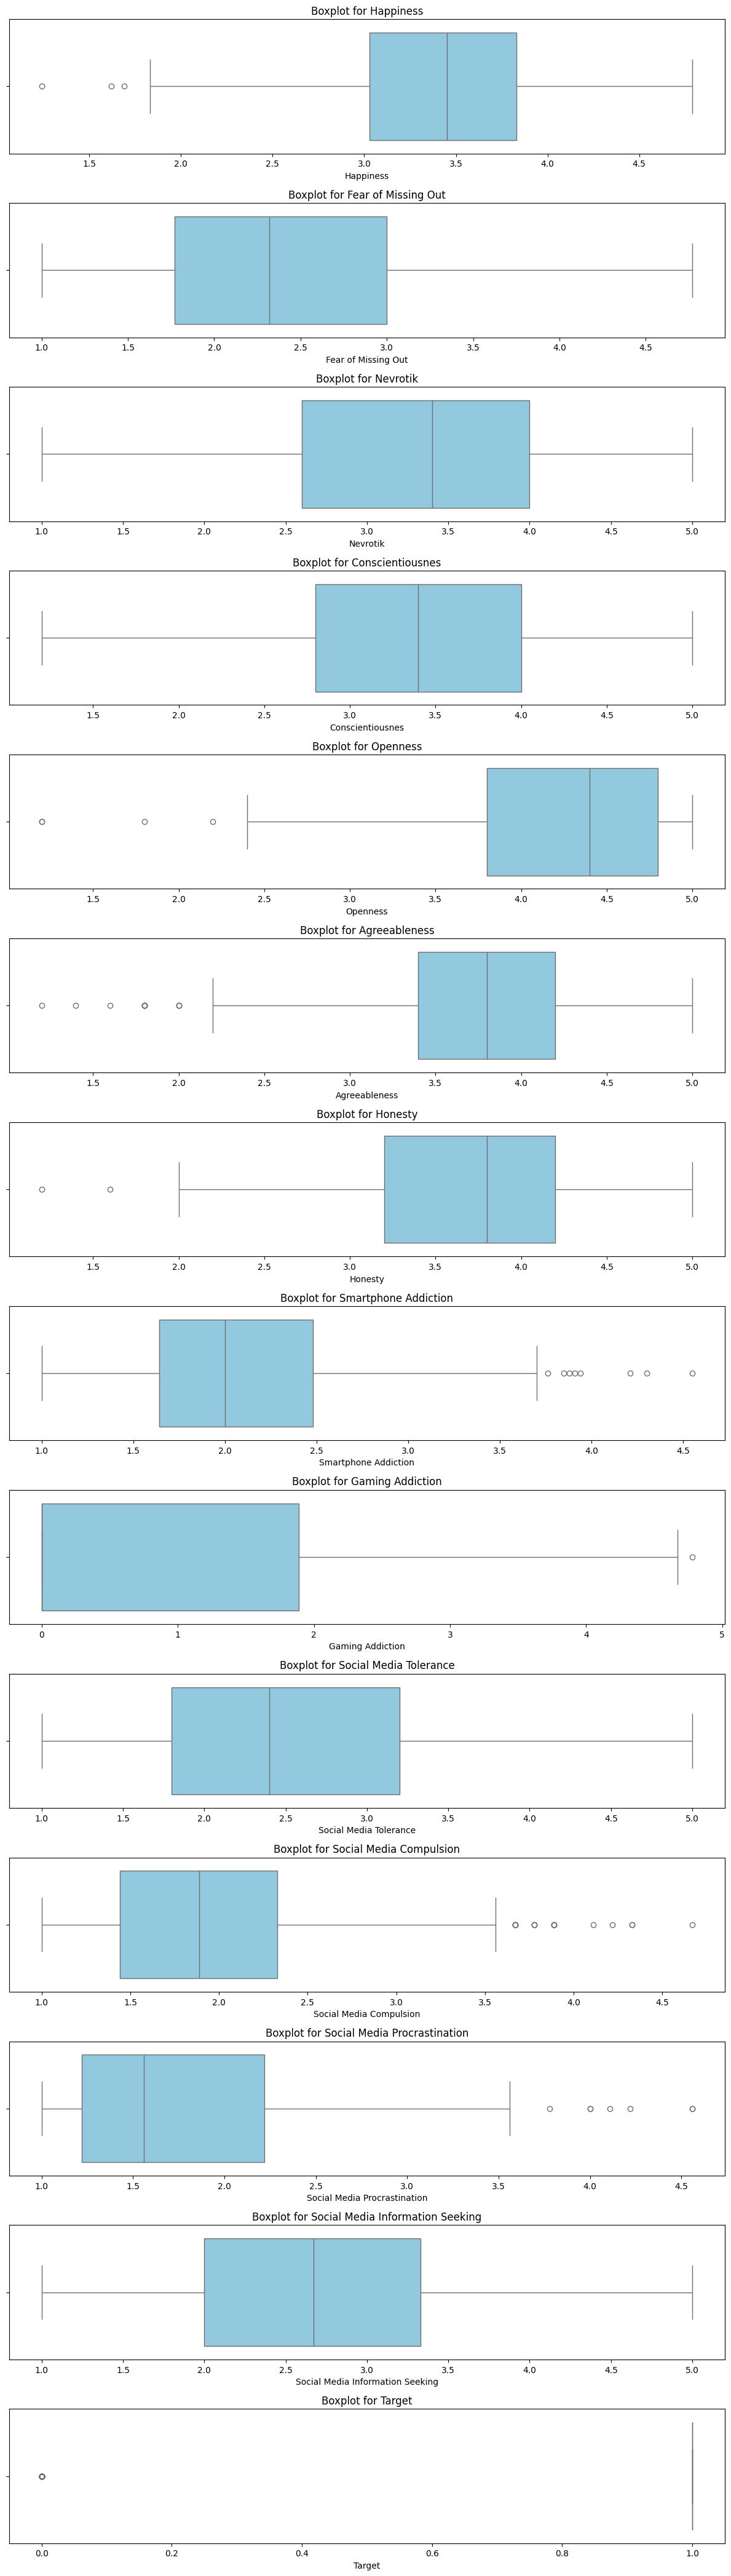

In [63]:
# Plot histograms for numeric columns
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Pair plot for numerical features
sns.pairplot(df, diag_kind="kde", corner=True, height=2, plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Numerical Features", fontsize=16)
plt.show()

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for features vs target
target_col = 'Target'  # Replace with the actual target column
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, len(numeric_cols) * 4))
for i, col in enumerate(numeric_cols, 1):
    if col != target_col:  # Avoid target vs target
        plt.subplot(len(numeric_cols)-1, 2, i)
        sns.scatterplot(data=df, x=col, y=target_col, color="blue")
        plt.title(f"Scatter Plot: {col} vs {target_col}")
plt.tight_layout()
plt.show()

# Boxplots for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, len(numeric_cols) * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f"Boxplot for {col}")
plt.tight_layout()
plt.show()



Non linear relations

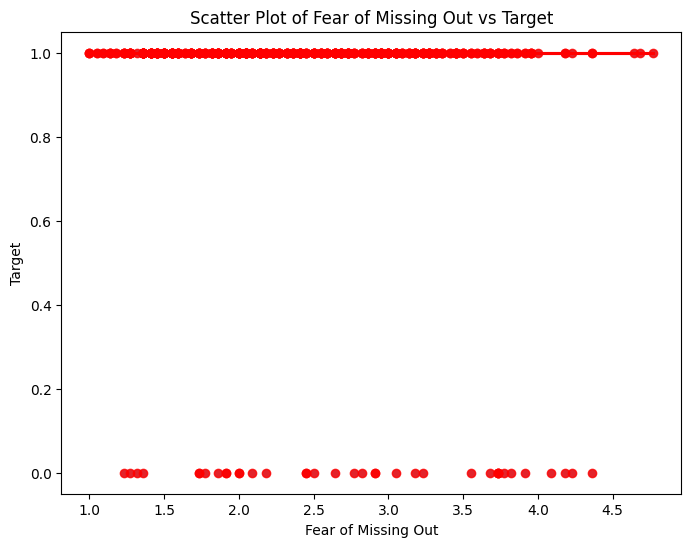

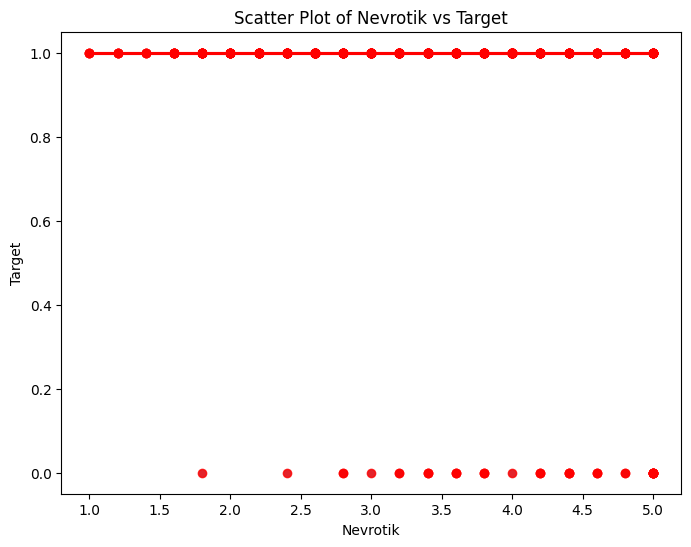

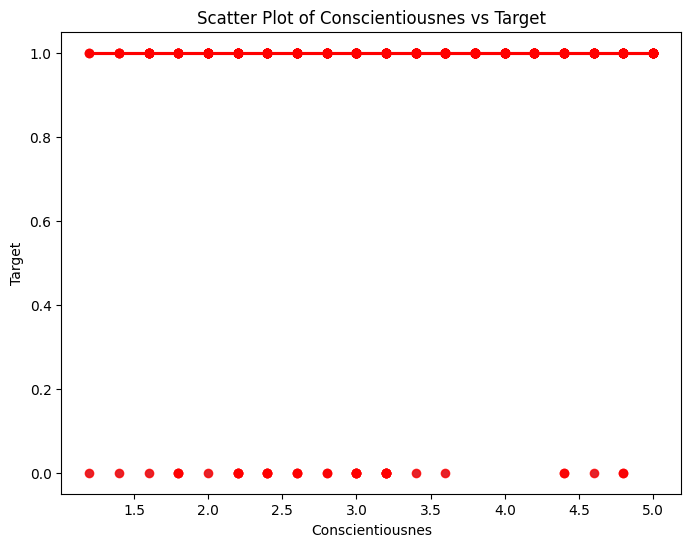

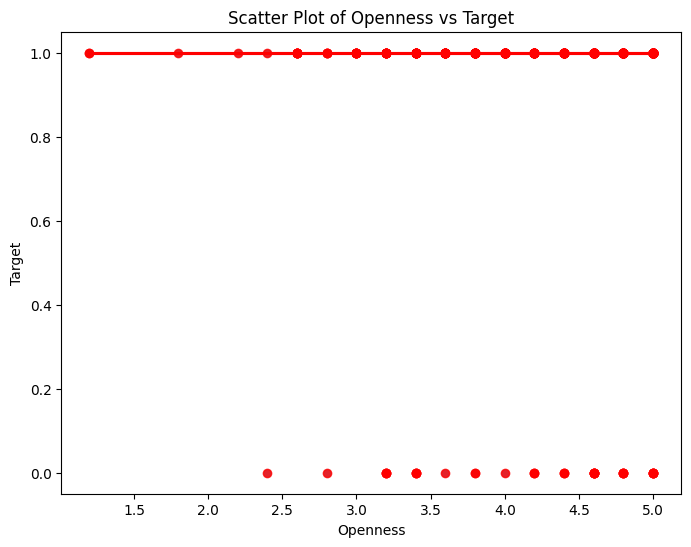

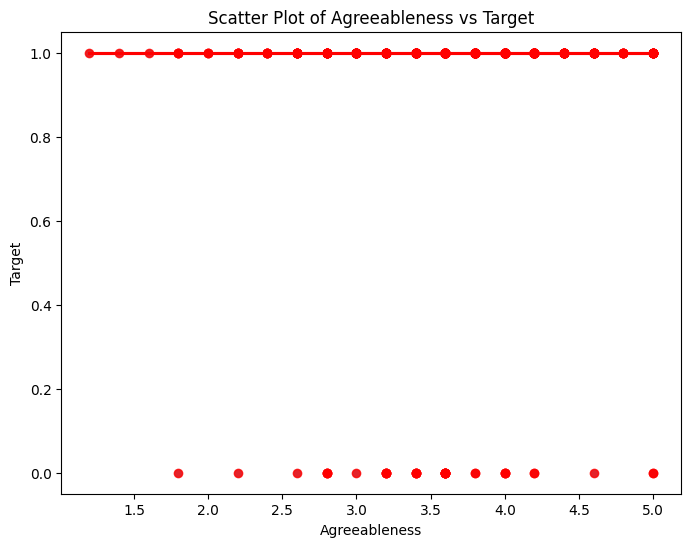

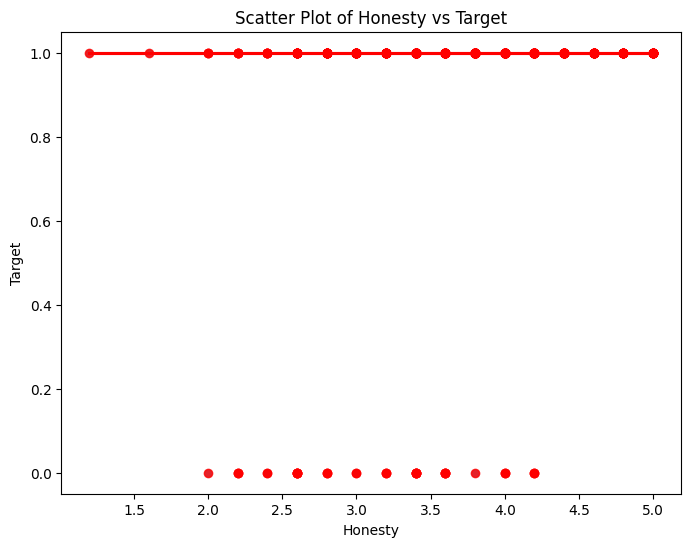

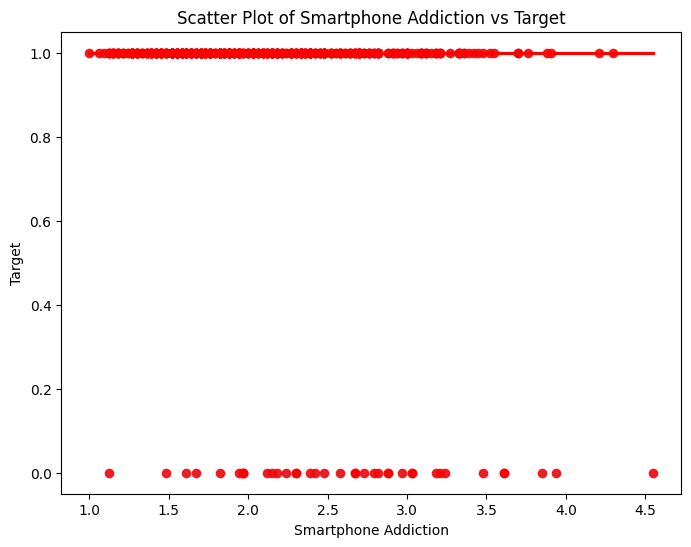

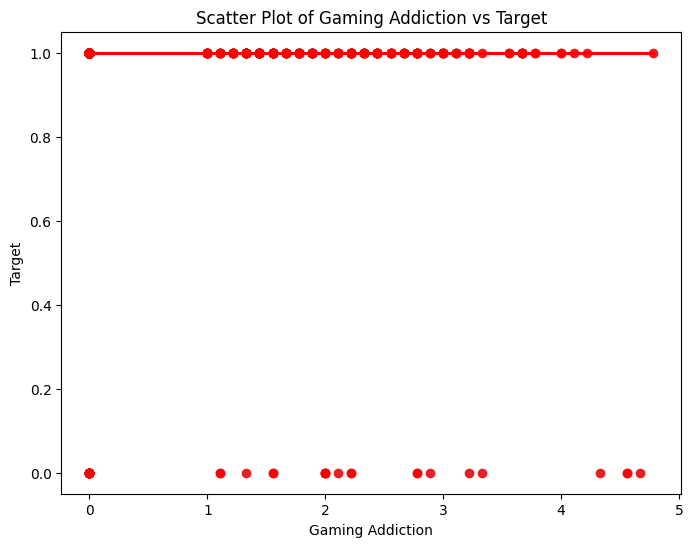

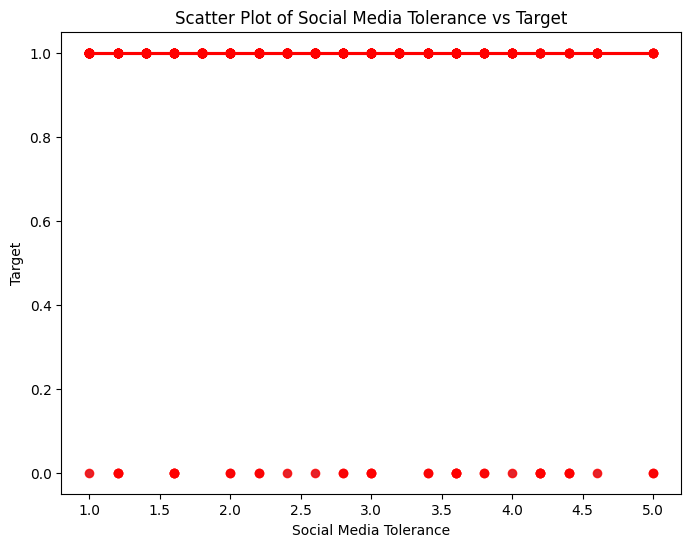

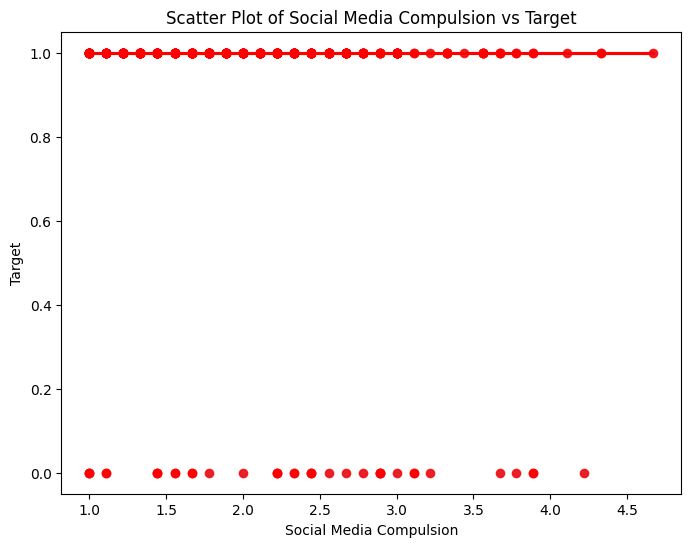

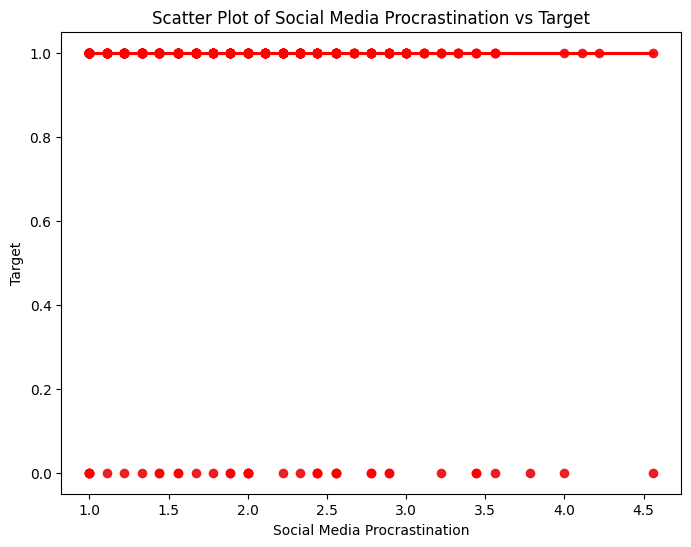

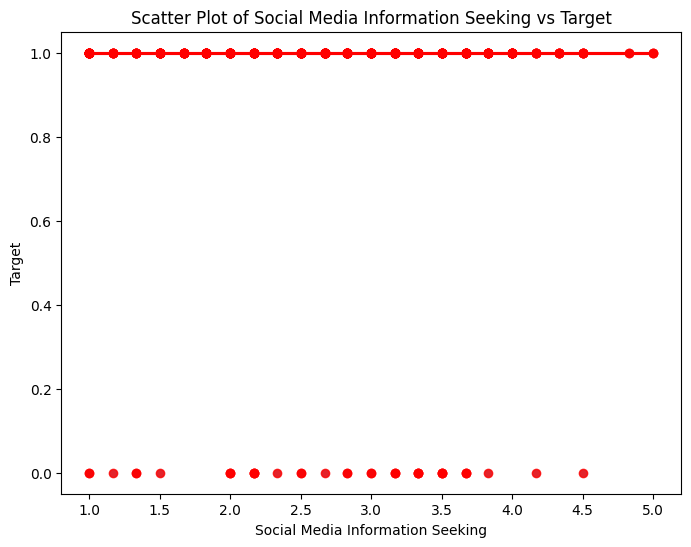

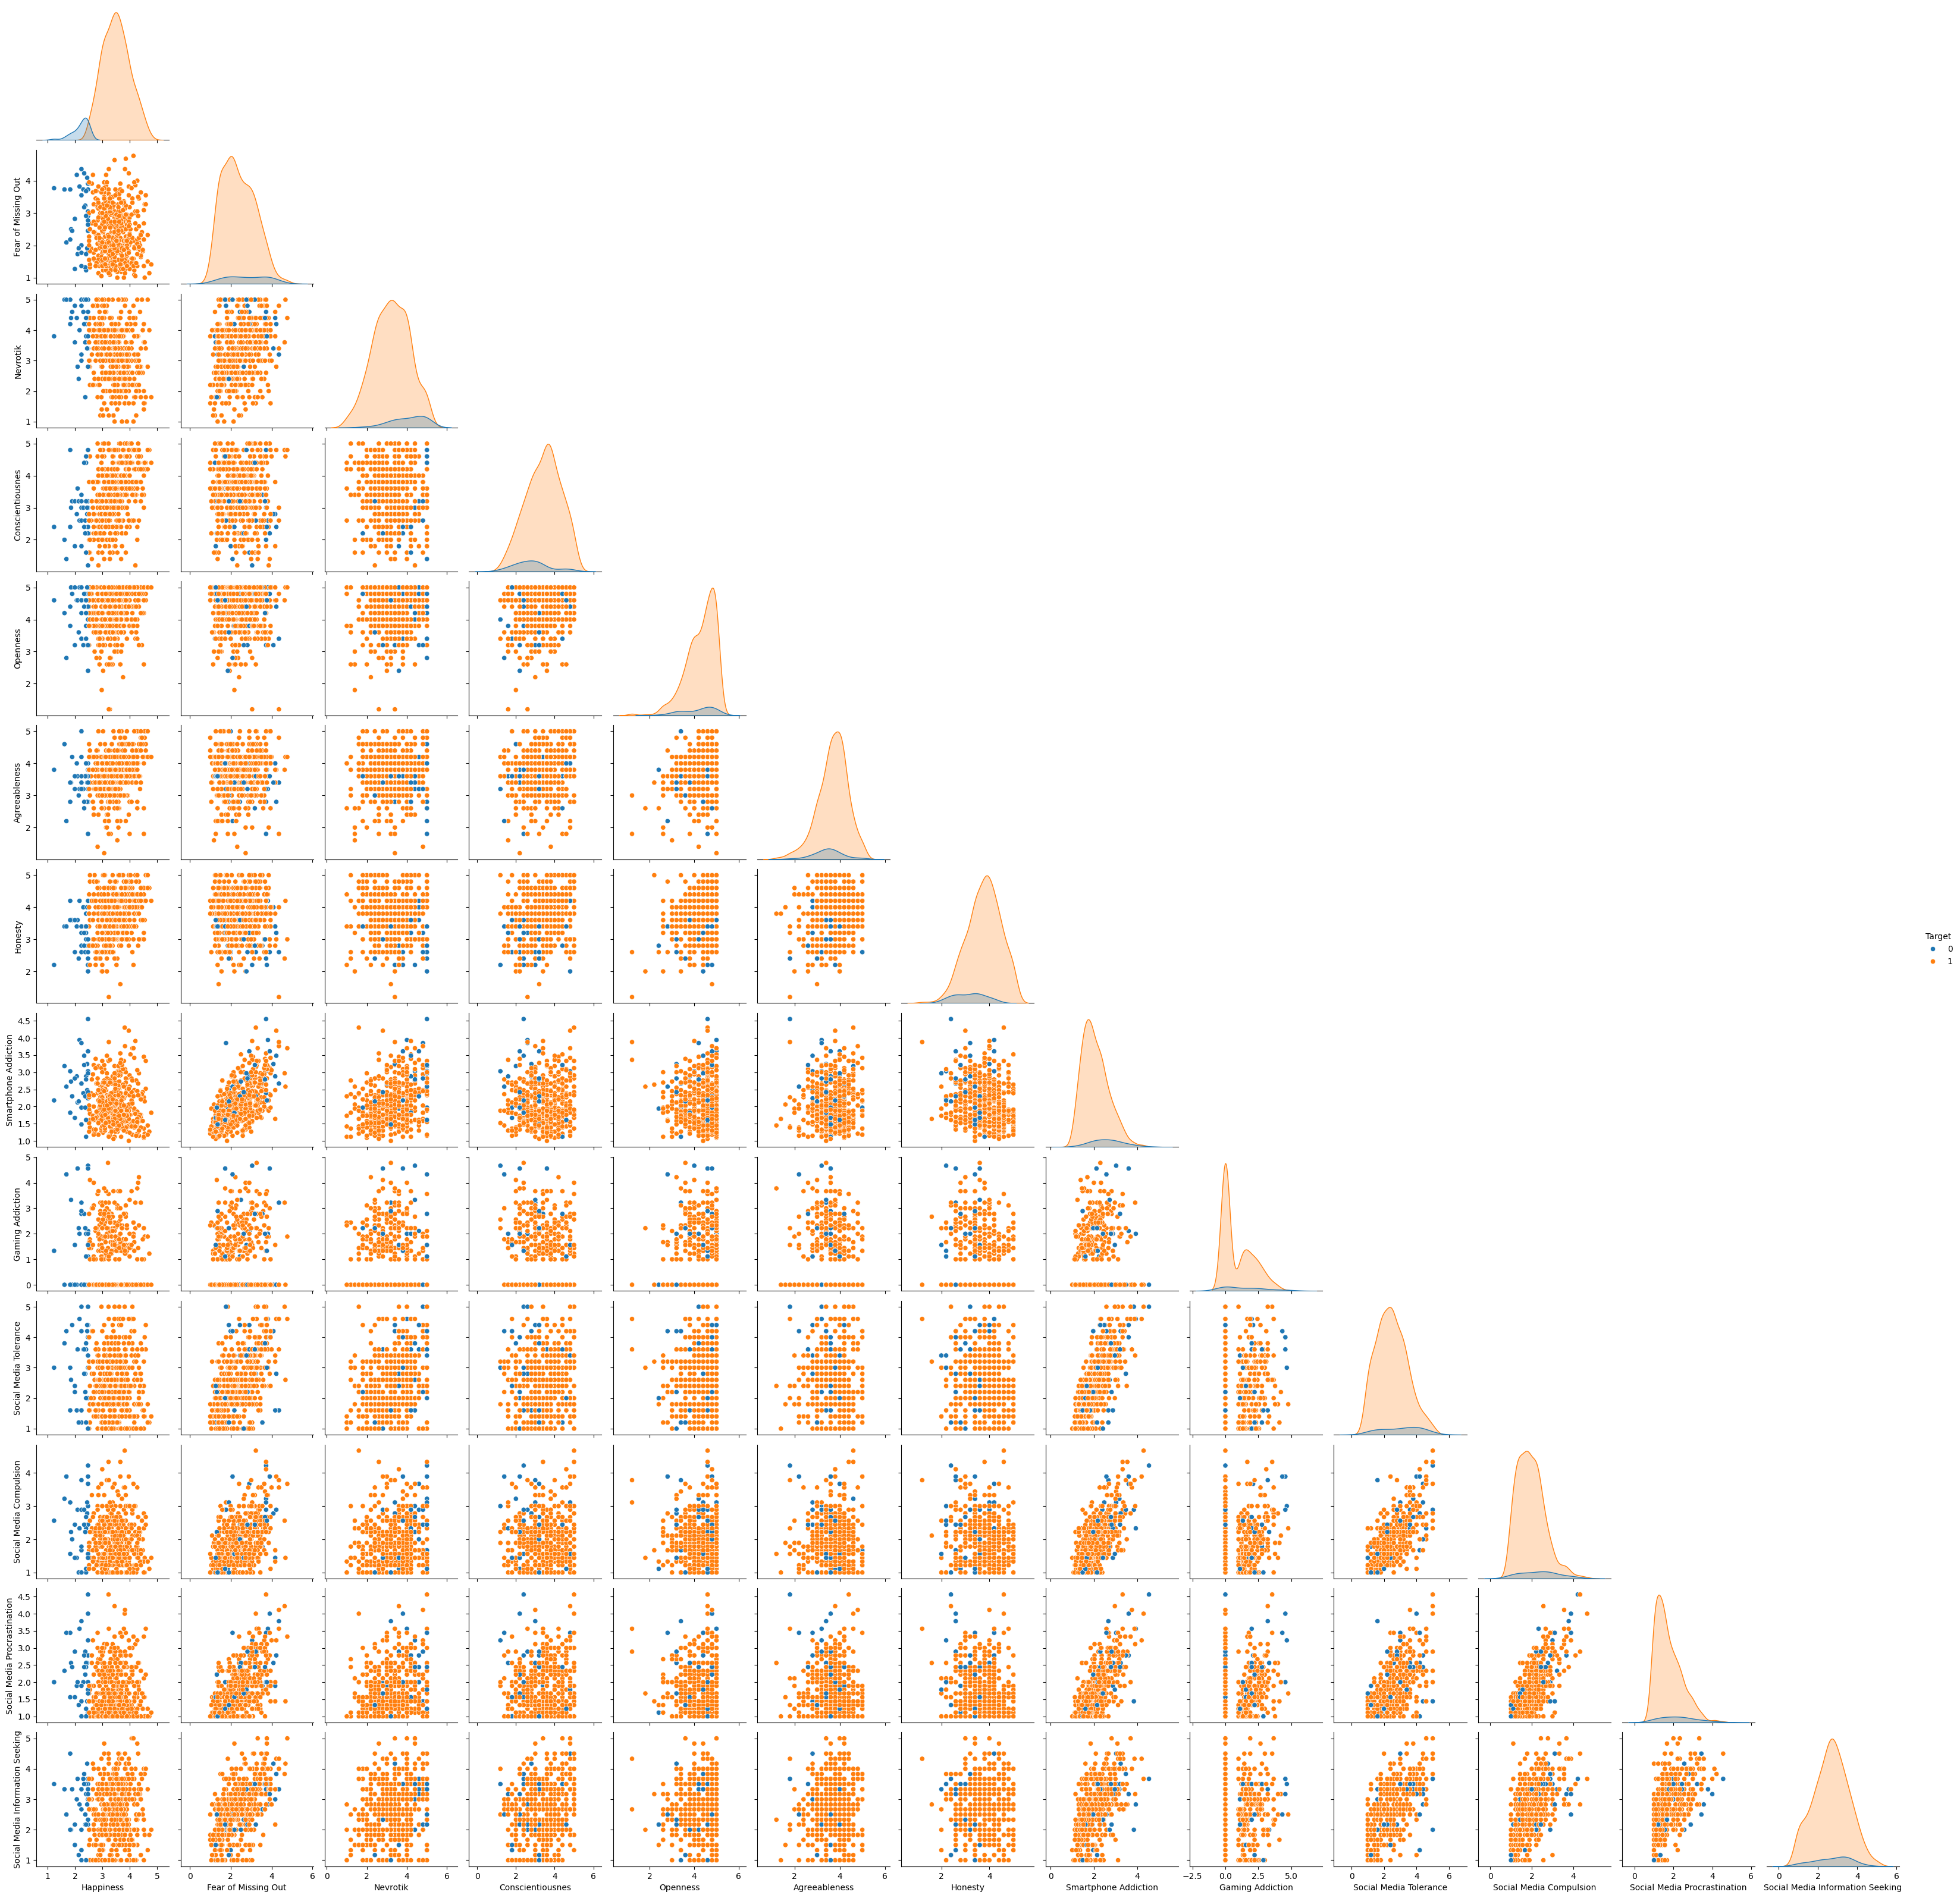

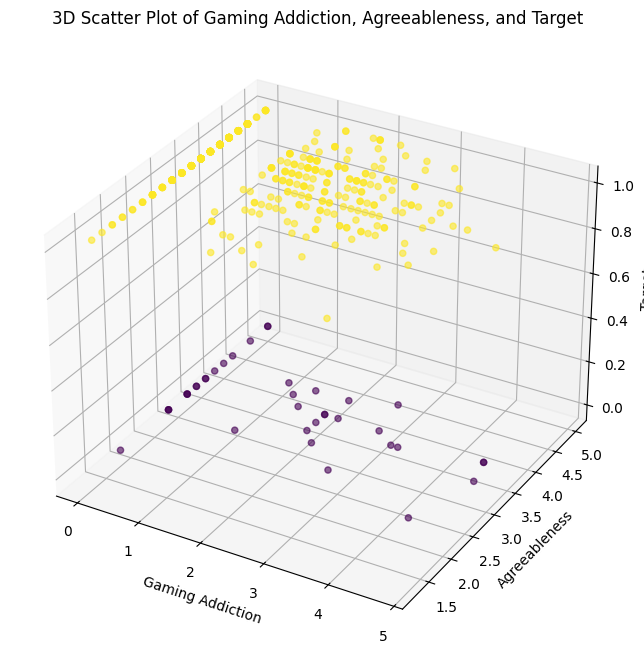

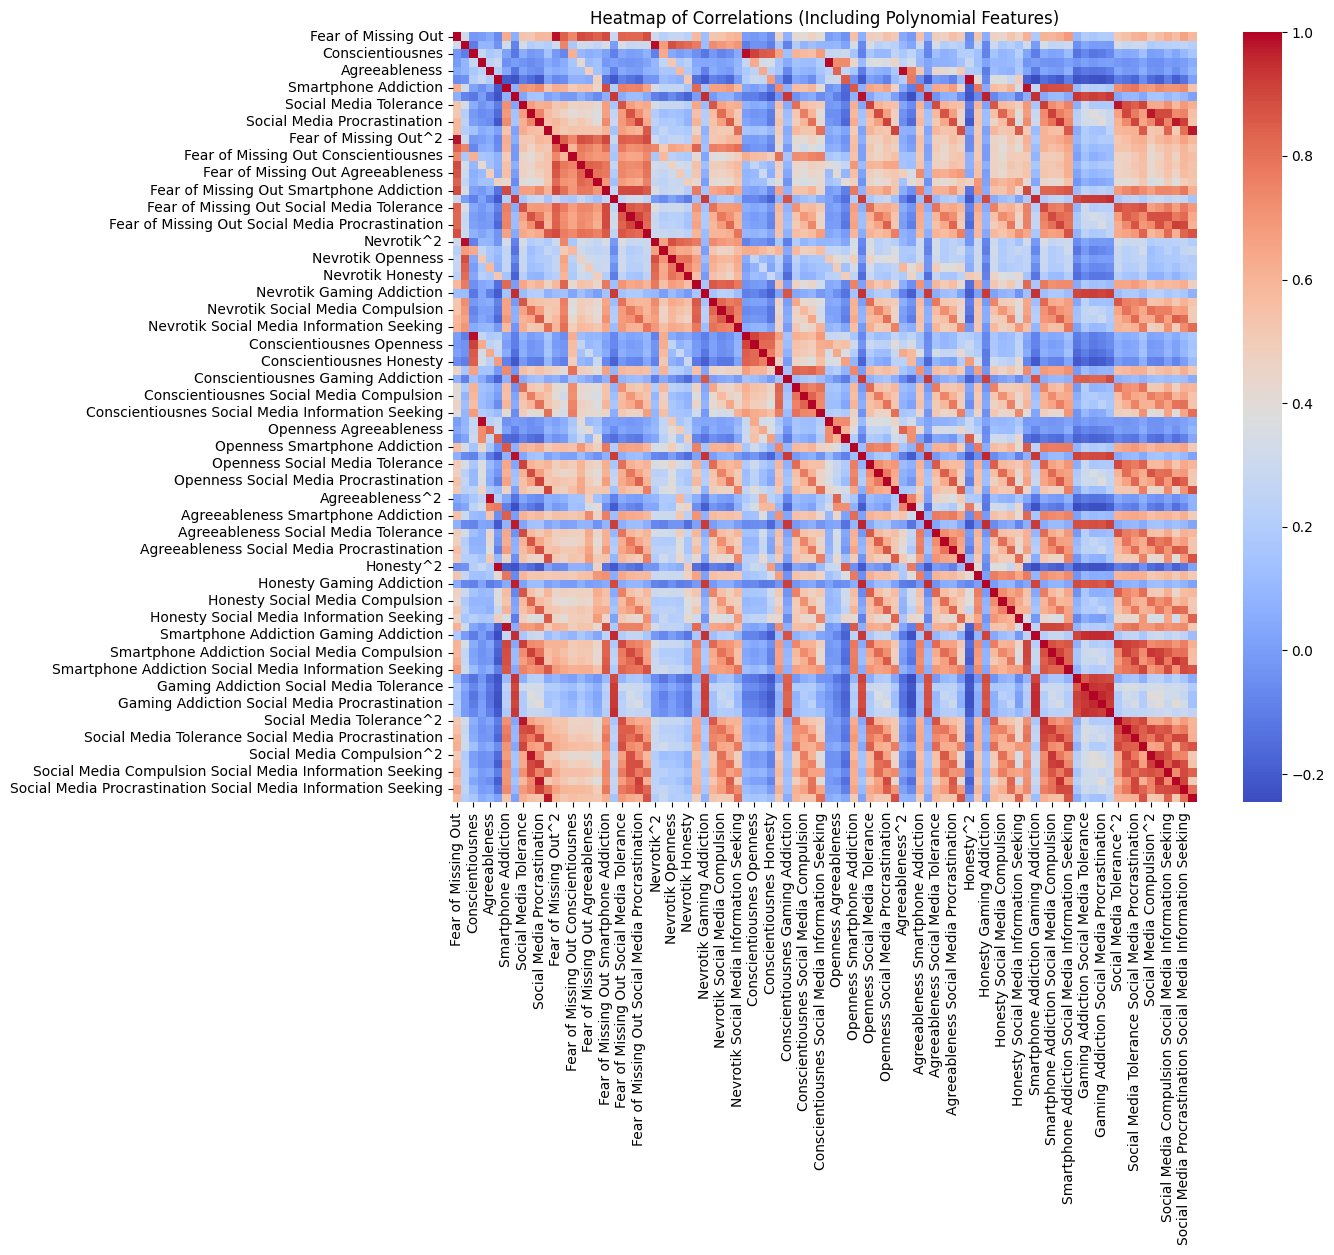

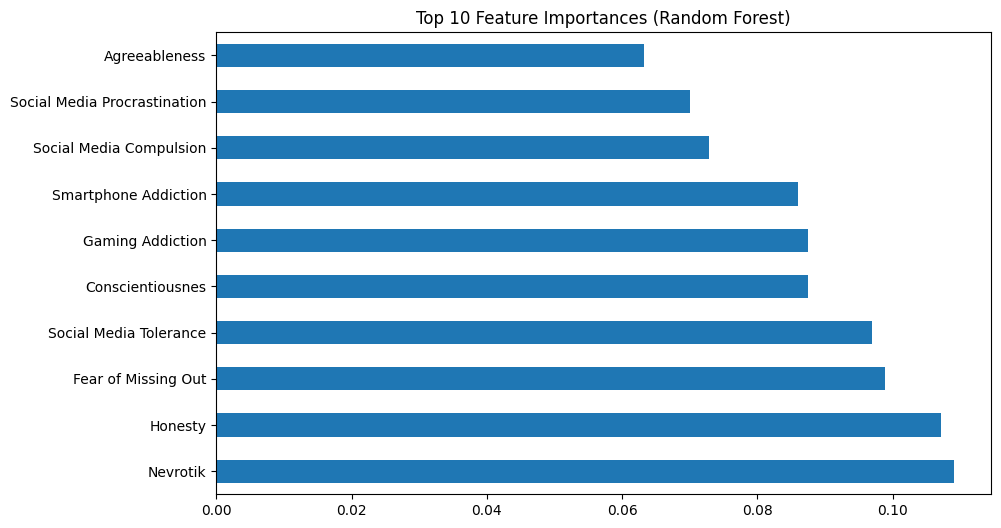

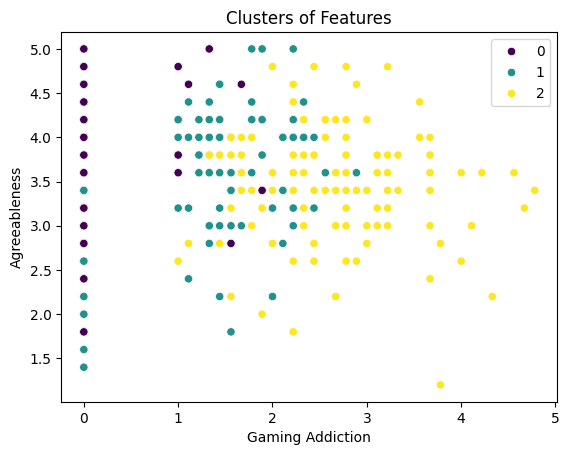

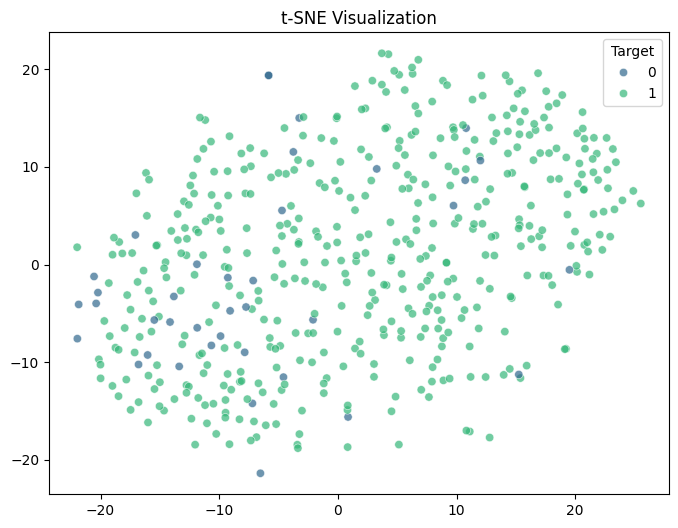

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Scatter plot with a non-linear trend line
for feature in X.columns:  # Loop over feature columns
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['Target'], alpha=0.6)
    sns.regplot(x=df[feature], y=df['Target'], lowess=True, color='red')  # Add a LOESS trend line
    plt.title(f"Scatter Plot of {feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.show()

sns.pairplot(df, hue='Target', diag_kind='kde', corner=True)
plt.show()


from mpl_toolkits.mplot3d import Axes3D

# Select two features and the target
feature1 = 'Gaming Addiction'  # Replace with feature names
feature2 = 'Agreeableness'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[feature1], df[feature2], df['Target'], alpha=0.6, c=df['Target'], cmap='viridis')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel('Target')
plt.title(f"3D Scatter Plot of {feature1}, {feature2}, and Target")
plt.show()

from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_features = poly.get_feature_names_out(X.columns)

# Create a DataFrame of polynomial features
X_poly_df = pd.DataFrame(X_poly, columns=poly_features)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X_poly_df.corr(), cmap='coolwarm', annot=False)
plt.title("Heatmap of Correlations (Including Polynomial Features)")
plt.show()

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

# Visualize feature importance
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualize clusters using the correct feature names (feature1 and feature2)
sns.scatterplot(x=df[feature1], y=df[feature2], hue=clusters, palette='viridis')
plt.title("Clusters of Features")
plt.show()

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
# Apply t-SNE on the scaled data that matches the target variable's length
X_tsne = tsne.fit_transform(X_scaled[:len(y)])  # Use only the first 'len(y)' rows

# Now plot with the corrected X_tsne
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title("t-SNE Visualization")
plt.show()





In [65]:
# View dataset information (column names, data types, etc.)
df.info()

# Get summary statistics of numerical columns
df.describe()

# Check for any missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Happiness                         497 non-null    float64
 1   Fear of Missing Out               497 non-null    float64
 2   Nevrotik                          497 non-null    float64
 3   Conscientiousnes                  497 non-null    float64
 4   Openness                          497 non-null    float64
 5   Agreeableness                     497 non-null    float64
 6   Honesty                           497 non-null    float64
 7   Smartphone Addiction              497 non-null    float64
 8   Gaming Addiction                  497 non-null    float64
 9   Social Media Tolerance            497 non-null    float64
 10  Social Media Compulsion           497 non-null    float64
 11  Social Media Procrastination      497 non-null    float64
 12  Social M

Happiness                           0
Fear of Missing Out                 0
Nevrotik                            0
Conscientiousnes                    0
Openness                            0
Agreeableness                       0
Honesty                             0
Smartphone Addiction                0
Gaming Addiction                    0
Social Media Tolerance              0
Social Media Compulsion             0
Social Media Procrastination        0
Social Media Information Seeking    0
Target                              0
dtype: int64

There are no missing values.

Outlier Detection

We are using box plots to detect outliers since this method is robust to outliers.

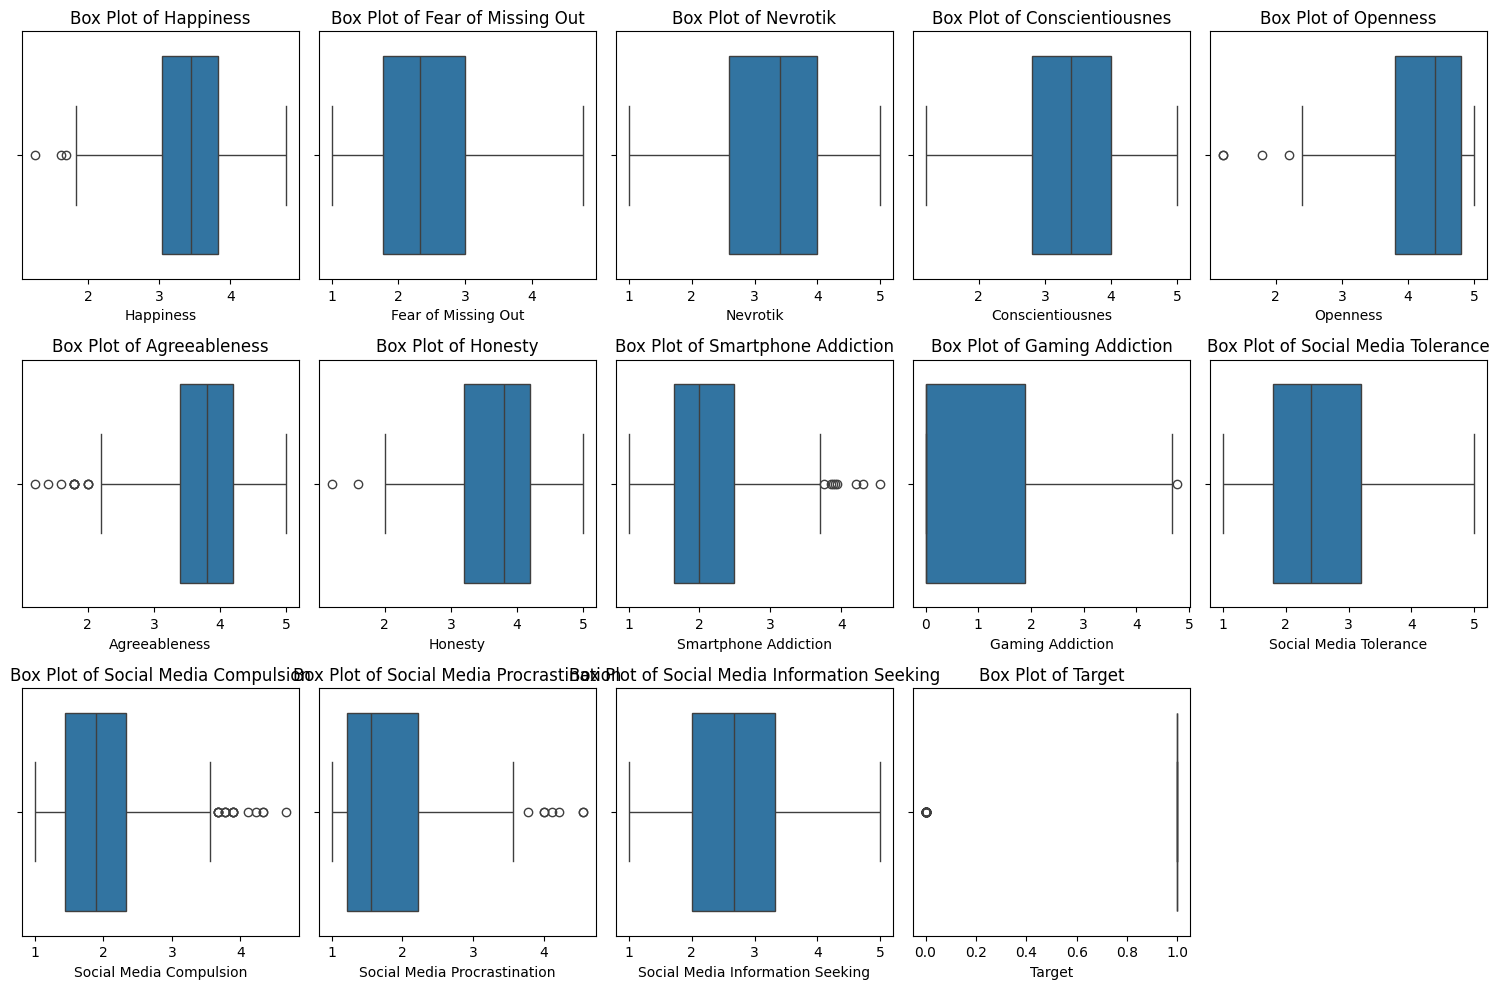

Outliers detected in Happiness (IQR method):
     Happiness
11        1.62
391       1.69
463       1.24


No outliers detected in Fear of Missing Out (IQR method)

No outliers detected in Nevrotik (IQR method)

No outliers detected in Conscientiousnes (IQR method)

Outliers detected in Openness (IQR method):
     Openness
168       2.2
181       1.8
402       1.2
492       1.2


Outliers detected in Agreeableness (IQR method):
     Agreeableness
7              1.8
13             1.8
14             2.0
90             1.8
151            1.6
215            1.4
247            1.8
273            2.0
303            2.0
475            1.2
492            1.8


Outliers detected in Honesty (IQR method):
     Honesty
492      1.2
495      1.6


Outliers detected in Smartphone Addiction (IQR method):
     Smartphone Addiction
3                    4.30
7                    4.55
28                   3.94
158                  4.21
199                  3.85
226                  3.91
422             

In [66]:
from scipy.stats import zscore

# Step 2: List of numerical columns (assuming all columns are numerical)
numerical_columns = df.columns.tolist()

# Step 3: Visualize outliers using box plot
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 5, i)  # Create a grid of subplots (3 rows, 5 columns)
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

# Step 4: Detect outliers using IQR (Interquartile Range) method
outliers_iqr = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the column
    outliers_iqr[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print outliers for each column
    if not outliers_iqr[column].empty:
        print(f"Outliers detected in {column} (IQR method):")
        print(outliers_iqr[column][[column]])
        print("\n")
    else:
        print(f"No outliers detected in {column} (IQR method)\n")

# Step 5: Detect outliers using Z-Score method (assuming normal distribution)
df_z = df.apply(zscore)

# Define a threshold for outliers (usually 3 or -3)
threshold = 3

outliers_zscore = {}

for column in numerical_columns:
    outliers_zscore[column] = df_z[df_z[column].abs() > threshold]

    # Print outliers for each column
    if not outliers_zscore[column].empty:
        print(f"Outliers detected in {column} (Z-Score method):")
        print(outliers_zscore[column][[column]])
        print("\n")
    else:
        print(f"No outliers detected in {column} (Z-Score method)\n")


Understanding the Output:
Outliers using the IQR method: These are values that fall outside the lower and upper bounds based on the interquartile range (Q1 - 1.5 * IQR and Q3 + 1.5 * IQR).

Outliers using the Z-Score method: These are values that have a Z-score greater than 3 or less than -3, meaning they are more than 3 standard deviations away from the mean.

Result:
After checking the outliers manually, we decided to keep them since we condsider them natural variability.

Feature selection

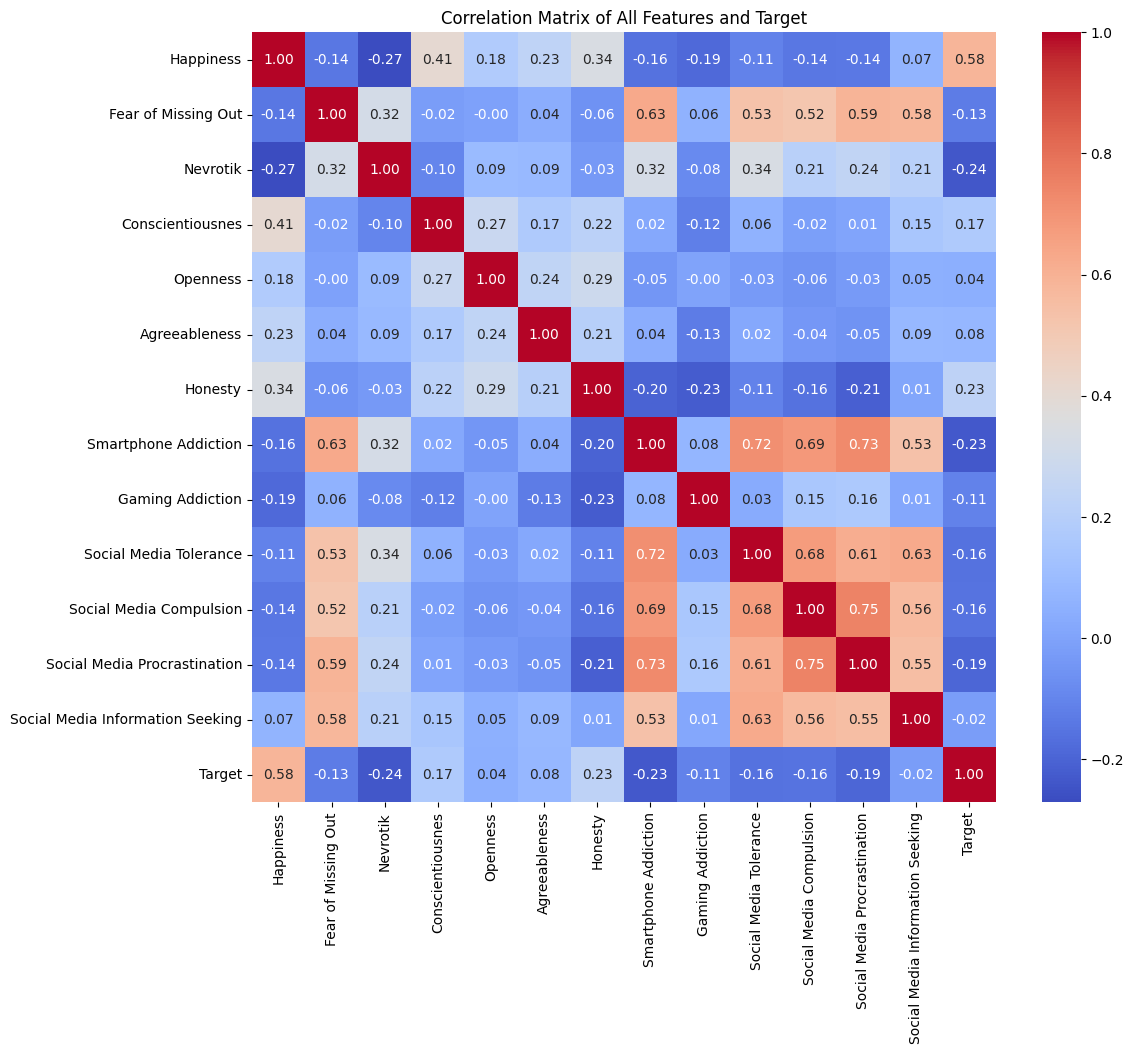

In [67]:
# 2. Select features and target variable (include all features here)
features_and_target = df.columns  # Includes all columns, including 'Happiness'

# 3. Create the correlation matrix
corr_matrix_all = df[features_and_target].corr()

# 4. Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Features and Target")
plt.show()

In [68]:
# 1. Calculate correlations with the target variable
correlations = df.corr()['Happiness'].abs().sort_values(ascending=False)
# We use .abs() to consider both positive and negative correlations

# 2. Display the correlations
print("Correlations with Target Variable (Happiness):")
print(correlations)

# 3. Select features based on a threshold
threshold = 0.3
selected_features = correlations[correlations > threshold].index

# 4. Print the selected features
print("\nSelected Features (Correlation > threshold):")
print(selected_features)

Correlations with Target Variable (Happiness):
Happiness                           1.000000
Target                              0.584437
Conscientiousnes                    0.406630
Honesty                             0.342402
Nevrotik                            0.270650
Agreeableness                       0.234866
Gaming Addiction                    0.185845
Openness                            0.180572
Smartphone Addiction                0.157130
Fear of Missing Out                 0.142976
Social Media Compulsion             0.142485
Social Media Procrastination        0.138365
Social Media Tolerance              0.108168
Social Media Information Seeking    0.065390
Name: Happiness, dtype: float64

Selected Features (Correlation > threshold):
Index(['Happiness', 'Target', 'Conscientiousnes', 'Honesty'], dtype='object')


After feature selection, we have evaluated the model and decided to keep all the features even if some has a weak correlation with the happiness. We analyze also the relations of the features between each other. We tried to train model with removing the two weekest features and the model performance had been affected negatively.

Logistic Regression:
Accuracy: 0.7934782608695652
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        91
           1       0.82      0.76      0.79        93

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184


Random Forest:
Accuracy: 0.9293478260869565
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        91
           1       0.97      0.89      0.93        93

    accuracy                           0.93       184
   macro avg       0.93      0.93      0.93       184
weighted avg       0.93      0.93      0.93       184



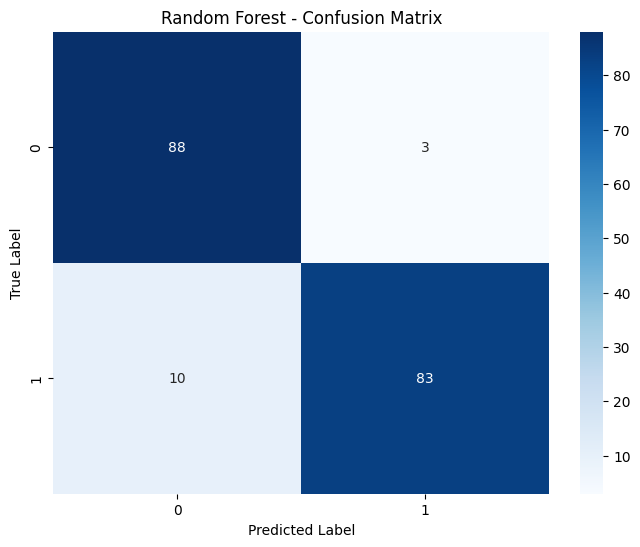


Support Vector Machine (SVM):
Accuracy: 0.9021739130434783
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        91
           1       0.97      0.83      0.90        93

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.90      0.90       184


K-Nearest Neighbors (KNN):
Accuracy: 0.8967391304347826
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        91
           1       1.00      0.80      0.89        93

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.91      0.90      0.90       184


Random Forest Cross-Validation:
Mean Accuracy: 0.92919933475885
Standard Deviation: 0.025039840416667472


In [69]:
# 1. Import Required Libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Data
df = pd.read_csv('mental_health_and_technology_usage_2024.csv')

# Drop the `Happiness` column (to prevent data leakage)
X = df.drop(columns=['Target', 'Happiness'])
y = df['Target']

# 3. Handle Data Imbalance with SMOTE (only applies to `Target`)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Optional: Create a new DataFrame with the resampled data for exploration
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Target'] = y_resampled

# 4. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# 5. Apply PCA for Dimensionality Reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# 6. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

# 7. Train Models and Evaluate Performance
# Logistic Regression bruk cross validation also for this
print("Logistic Regression:")
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")
print(classification_report(y_test, y_pred_logistic))

# Random Forest
print("\nRandom Forest:")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM):")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

# K-Nearest Neighbors (KNN)
print("\nK-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

# 8. Cross-Validation on Random Forest
print("\nRandom Forest Cross-Validation:")
cv_scores_rf = cross_val_score(rf_model, X_pca, y_resampled, cv=5, scoring='accuracy')
print(f"Mean Accuracy: {cv_scores_rf.mean()}")
print(f"Standard Deviation: {cv_scores_rf.std()}")


In cases where data imbalance exists in the Target column (e.g., 300 1s and 30 0s), it is crucial to handle the imbalance properly to ensure fair model training.

Target:

The Target column is what you are predicting, so it is used as the dependent variable (label) during training. It is also the column on which SMOTE will operate to balance the classes.
Keep the Target column but exclude it from the features (X) during training.
Happiness:

Since Happiness is directly correlated with the Target, it should not be included as a feature in the training process to avoid data leakage.
Exclude the Happiness column from the feature matrix (X) before applying SMOTE and training.

Explanation
Dropped Happiness:

It’s excluded from the feature set (X) because it directly correlates with the Target and could cause data leakage.
SMOTE:

Balances the Target column by oversampling the minority class.
SMOTE is applied only on the Target and features without Happiness.
Scaling and PCA:

After balancing the data, features are scaled with StandardScaler and reduced using PCA.
Split Data:

The PCA-transformed data is split into training and testing sets.
Model Training:

Models are trained using Logistic Regression, Random Forest, SVM, and KNN.
Evaluation metrics include accuracy, classification reports, and confusion matrices.
Cross-Validation:

Performed on the Random Forest model to estimate its generalization performance.
This approach ensures no data leakage while addressing the class imbalance in the target variable.